In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import re
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
# Load your dataset
df = pd.read_csv('data.csv')





In [ ]:
# Display the first few rows of the dataset
print(df.head())

   Unnamed: 0       brand              model  color registration_date    year  \
0           0  alfa-romeo     Alfa Romeo GTV    red           10/1995  1995.0   
1           1  alfa-romeo     Alfa Romeo 164  black           02/1995  1995.0   
3           3  alfa-romeo  Alfa Romeo Spider  black           07/1995  1995.0   
4           4  alfa-romeo     Alfa Romeo 164    red           11/1996  1996.0   
5           5  alfa-romeo  Alfa Romeo Spider    red           04/1996  1996.0   

   price_in_euro  power_kw  power_ps transmission_type fuel_type  \
0         1300.0     148.0     201.0            Manual    Petrol   
1        24900.0     191.0     260.0            Manual    Petrol   
3         4900.0     110.0     150.0            Manual    Petrol   
4        17950.0     132.0     179.0            Manual    Petrol   
5         7900.0     110.0     150.0            Manual    Petrol   

   fuel_consumption_l_100km  fuel_consumption_g_km  mileage_in_km  \
0                 10.900000        

In [ ]:
# Get information about the dataset
print(df.info())


In [ ]:

# Check for missing values
print(df.isnull().sum())

In [ ]:
# Summary statistics
print(df.describe())

In [ ]:
# Distribution of categorical variables
print(df['brand'].value_counts())
print(df['color'].value_counts())
print(df['transmission_type'].value_counts())
print(df['fuel_type'].value_counts())

In [ ]:
#remove irelevant
relevant_brands = ['volkswagen', 'mercedes-benz', 'audi', 'opel', 'bmw', 'ford', 'skoda', 'seat', 'renault', 'toyota', 'hyundai', 'peugeot', 'kia', 'fiat', 'mini', 'mazda', 'volvo', 'citroen', 'porsche', 'nissan', 'dacia', 'land-rover', 'jeep', 'smart', 'alfa-romeo', 'jaguar', 'mitsubishi', 'honda', 'maserati', 'dodge', 'ferrari', 'bentley', 'lamborghini', 'ssangyong', 'aston-martin', 'saab', 'isuzu', 'daihatsu', 'chevrolet', 'lada', 'cadillac', 'infiniti', 'lancia', 'daewoo', 'rover', 'chrysler', 'proton']
df = df[df['brand'].isin(relevant_brands)]

relevant_colors = ['black', 'grey', 'white', 'silver', 'blue', 'red', 'brown', 'green', 'orange', 'beige', 'yellow', 'bronze', 'gold', 'violet']
df = df[df['color'].isin(relevant_colors)]

relevant_transmission_types = ['Automatic', 'Manual', 'Semi-automatic']
df = df[df['transmission_type'].isin(relevant_transmission_types)]

relevant_fuel_types = ['Petrol', 'Diesel', 'Hybrid', 'Electric', 'LPG']
df = df[df['fuel_type'].isin(relevant_fuel_types)]

df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.replace(',', '.')
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.extract('(\d+\.\d+)')
df['fuel_consumption_l_100km'] = pd.to_numeric(df['fuel_consumption_l_100km'], errors='coerce')


def parse_fuel_consumption_g_km(value):
    try:
        # Extract numeric values (including decimals) using regular expression
        numeric_value = float(re.search(r'(\d+\.\d+|\d+)', str(value)).group(1))
        return numeric_value
    except (AttributeError, ValueError):
        # Handle cases where extraction or conversion fails
        return None

# Apply the function to 'fuel_consumption_g_km' column
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].apply(parse_fuel_consumption_g_km)
df['year'] = pd.to_numeric(df['year'], errors='coerce', downcast='integer')

df['price_in_euro'] = pd.to_numeric(df['price_in_euro'], errors='coerce', downcast='integer')
df['power_kw'] = pd.to_numeric(df['power_kw'], errors='coerce', downcast='integer')
df['power_ps'] = pd.to_numeric(df['power_ps'], errors='coerce', downcast='integer')






In [ ]:
print(df['brand'].value_counts())
print(df['color'].value_counts())
print(df['transmission_type'].value_counts())
print(df['fuel_type'].value_counts())
print(df['fuel_consumption_g_km'].value_counts())


In [ ]:
print(df.head())
print(df.info())

In [ ]:
numeric_columns = df.select_dtypes(include=['int16', 'int32', 'float64']).columns


numeric_df = df[numeric_columns].copy()


imputer = IterativeImputer(random_state=42)


imputed_data = imputer.fit_transform(numeric_df)

df[numeric_columns] = imputed_data


print(df.head())

   Unnamed: 0       brand              model  color registration_date    year  \
0           0  alfa-romeo     Alfa Romeo GTV    red           10/1995  1995.0   
1           1  alfa-romeo     Alfa Romeo 164  black           02/1995  1995.0   
3           3  alfa-romeo  Alfa Romeo Spider  black           07/1995  1995.0   
4           4  alfa-romeo     Alfa Romeo 164    red           11/1996  1996.0   
5           5  alfa-romeo  Alfa Romeo Spider    red           04/1996  1996.0   

   price_in_euro  power_kw  power_ps transmission_type fuel_type  \
0         1300.0     148.0     201.0            Manual    Petrol   
1        24900.0     191.0     260.0            Manual    Petrol   
3         4900.0     110.0     150.0            Manual    Petrol   
4        17950.0     132.0     179.0            Manual    Petrol   
5         7900.0     110.0     150.0            Manual    Petrol   

   fuel_consumption_l_100km  fuel_consumption_g_km  mileage_in_km  \
0                 10.900000        

In [ ]:
numeric_columns = df.select_dtypes(include=['int16', 'int32', 'float64']).columns


numeric_df = df[numeric_columns]


lof = LocalOutlierFactor(n_neighbors=20)
outliers = lof.fit_predict(numeric_df)


df_no_outliers = df[outliers == 1]


print(df_no_outliers.head())

   Unnamed: 0       brand              model  color registration_date    year  \
0           0  alfa-romeo     Alfa Romeo GTV    red           10/1995  1995.0   
1           1  alfa-romeo     Alfa Romeo 164  black           02/1995  1995.0   
4           4  alfa-romeo     Alfa Romeo 164    red           11/1996  1996.0   
5           5  alfa-romeo  Alfa Romeo Spider    red           04/1996  1996.0   
6           6  alfa-romeo     Alfa Romeo 145    red           12/1996  1996.0   

   price_in_euro  power_kw  power_ps transmission_type fuel_type  \
0         1300.0     148.0     201.0            Manual    Petrol   
1        24900.0     191.0     260.0            Manual    Petrol   
4        17950.0     132.0     179.0            Manual    Petrol   
5         7900.0     110.0     150.0            Manual    Petrol   
6         3500.0     110.0     150.0            Manual    Petrol   

   fuel_consumption_l_100km  fuel_consumption_g_km  mileage_in_km  \
0                 10.900000        

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248237 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                248237 non-null  int64  
 1   brand                     248237 non-null  object 
 2   model                     248237 non-null  object 
 3   color                     248237 non-null  object 
 4   registration_date         248237 non-null  object 
 5   year                      248237 non-null  float64
 6   price_in_euro             248237 non-null  float64
 7   power_kw                  248237 non-null  float64
 8   power_ps                  248237 non-null  float64
 9   transmission_type         248237 non-null  object 
 10  fuel_type                 248237 non-null  object 
 11  fuel_consumption_l_100km  248237 non-null  float64
 12  fuel_consumption_g_km     248237 non-null  float64
 13  mileage_in_km             248237 non-null  f

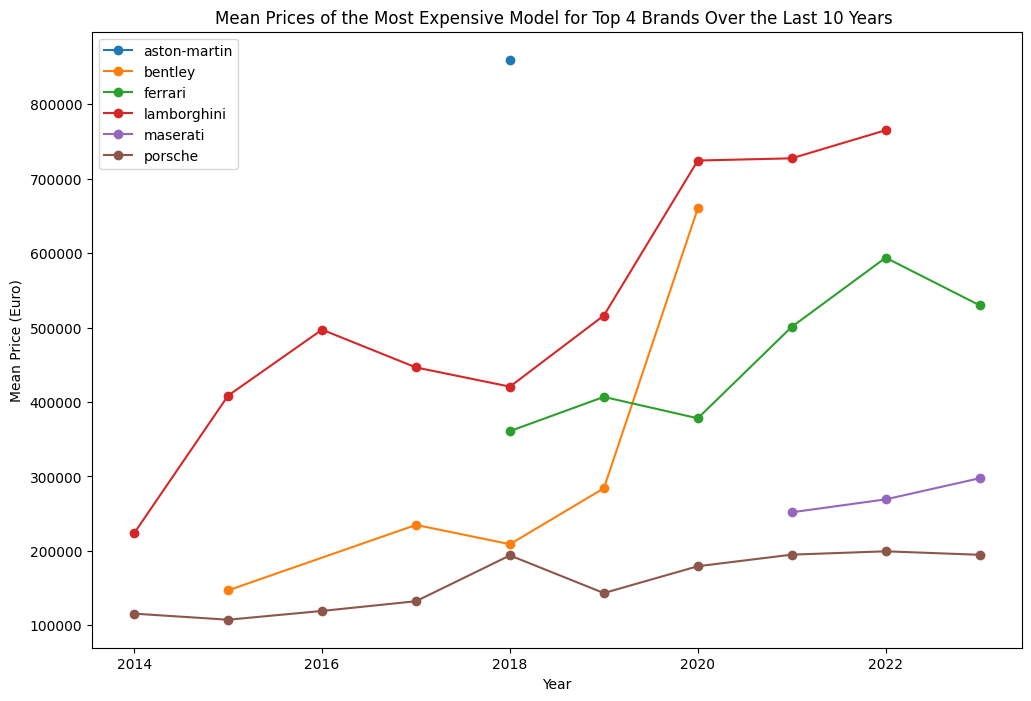

In [ ]:
#"How does the mean price of the most expensive model for each brand evolve over the last 10 years among the top 6 brands with the highest average prices? Are there noticeable trends, fluctuations, or patterns in the pricing dynamics, and what factors might contribute to such changes?"

top_brands = df_no_outliers.groupby('brand')['price_in_euro'].mean().nlargest(6).index

# Step 2: Filter the dataset for the last 10 years and the top brands
df_last_10_years = df_no_outliers[df_no_outliers['year'] >= (df_no_outliers['year'].max() - 9)]
df_top_brands = df_last_10_years[df_last_10_years['brand'].isin(top_brands)]

# Step 3: Identify the most expensive model for each brand
most_expensive_models = df_top_brands.loc[df_top_brands.groupby(['brand'])['price_in_euro'].idxmax()]

# Step 4: Filter the dataset for the most expensive models
df_most_expensive = df_top_brands[df_top_brands.set_index(['brand', 'model']).index.isin(most_expensive_models.set_index(['brand', 'model']).index)]
import numpy as np
plt.figure(figsize=(12, 8))

# Group data by year and brand, and calculate mean price
grouped_data = df_most_expensive.groupby(['year', 'brand'])['price_in_euro'].mean()

# Plotting mean prices for each brand
for brand in df_most_expensive['brand'].unique():
    brand_data = grouped_data.xs(brand, level='brand')
    plt.plot(brand_data.index, brand_data.values, label=brand, marker='o')

plt.title('Mean Prices of the Most Expensive Model for Top 4 Brands Over the Last 10 Years ')
plt.xlabel('Year')
plt.ylabel('Mean Price (Euro)')
plt.legend()
plt.show()






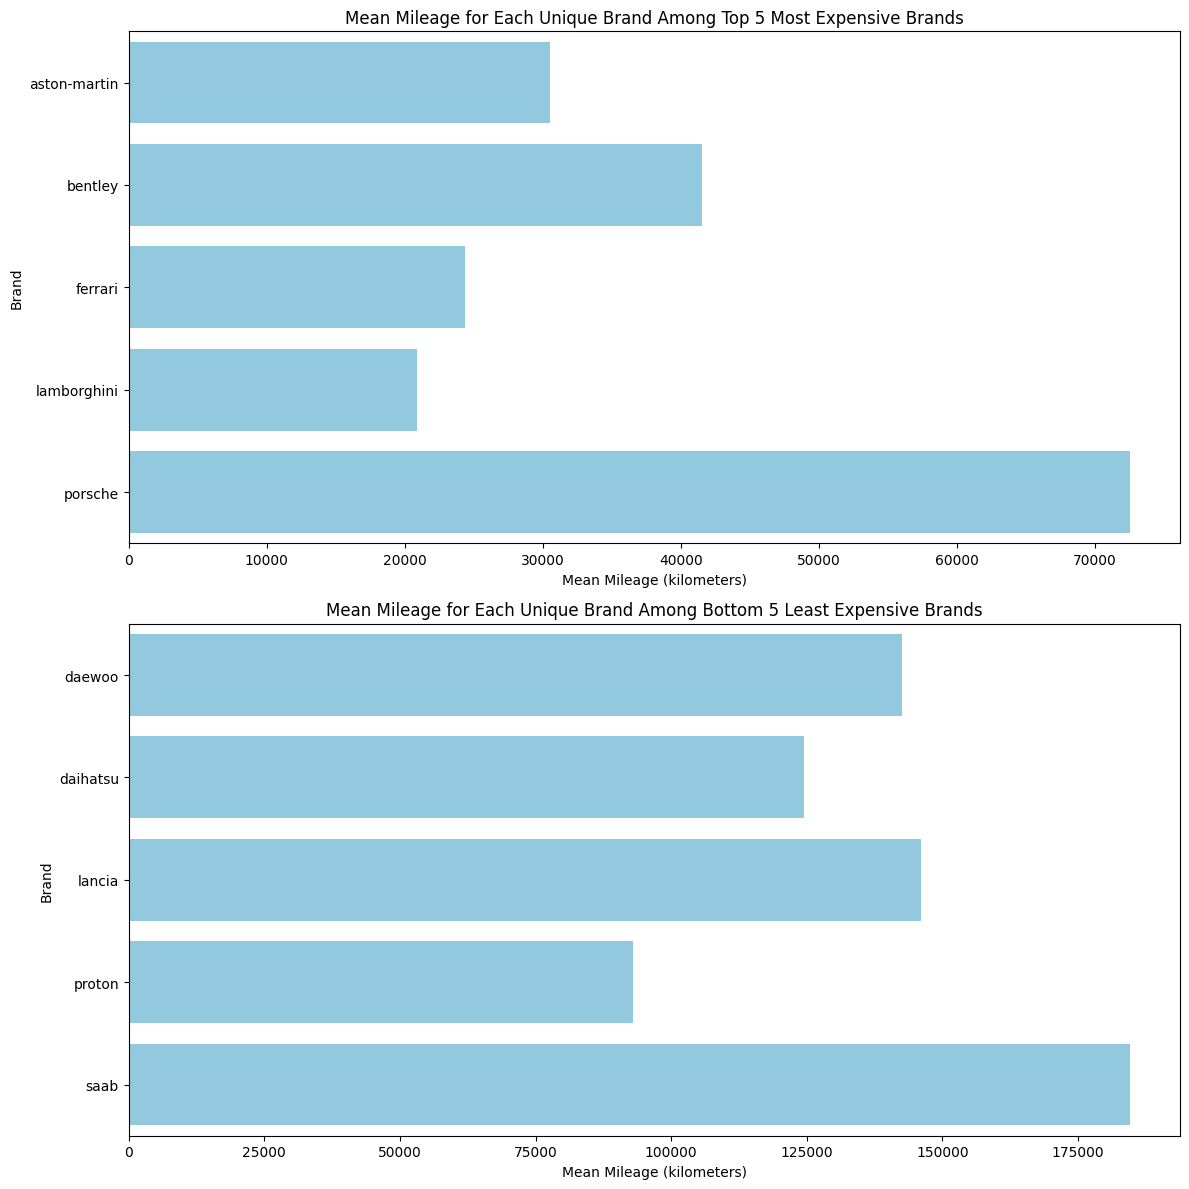

In [ ]:
#How does the mean mileage of vehicles vary among the top 5 most expensive car brands compared to the bottom 5 least expensive car brands?



# Identify the top 5 most expensive brands and bottom 5 least expensive brands based on mean price
top_expensive_brands = df_no_outliers.groupby('brand')['price_in_euro'].mean().nlargest(5).index
bottom_expensive_brands = df_no_outliers.groupby('brand')['price_in_euro'].mean().nsmallest(5).index

# Filter the DataFrame for the top 5 most expensive brands
df_top_expensive_brands = df_no_outliers[df_no_outliers['brand'].isin(top_expensive_brands)]

# Filter the DataFrame for the bottom 5 least expensive brands
df_bottom_expensive_brands = df_no_outliers[df_no_outliers['brand'].isin(bottom_expensive_brands)]

# Calculate the mean mileage for each unique car model among the top 5 most expensive brands
mean_mileage_top_brands = df_top_expensive_brands.groupby('brand')['mileage_in_km'].mean().reset_index()

# Calculate the mean mileage for each unique car model among the bottom 5 least expensive brands
mean_mileage_bottom_brands = df_bottom_expensive_brands.groupby('brand')['mileage_in_km'].mean().reset_index()

# Create a figure with two subplots (2 rows, 1 column)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Plot for the top 5 most expensive brands
sns.barplot(ax=axes[0], x='mileage_in_km', y='brand', data=mean_mileage_top_brands, color='skyblue')
axes[0].set_title('Mean Mileage for Each Unique Brand Among Top 5 Most Expensive Brands')
axes[0].set_xlabel('Mean Mileage (kilometers)')
axes[0].set_ylabel('Brand')

# Plot for the bottom 5 least expensive brands
sns.barplot(ax=axes[1], x='mileage_in_km', y='brand', data=mean_mileage_bottom_brands, color='skyblue')
axes[1].set_title('Mean Mileage for Each Unique Brand Among Bottom 5 Least Expensive Brands')
axes[1].set_xlabel('Mean Mileage (kilometers)')
axes[1].set_ylabel('Brand')

# Adjust layout for better presentation
plt.tight_layout()
plt.show()


The brand with the most models is volkswagen, and it has 84 unique models.


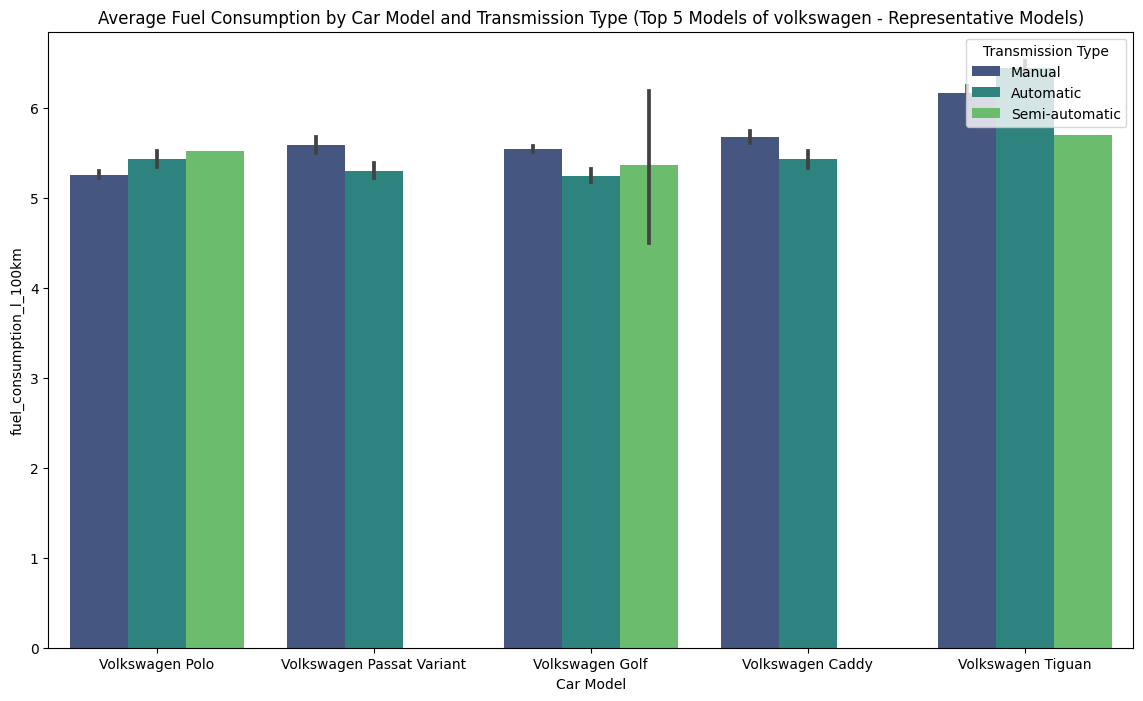

In [ ]:
# Find the brand with the most models
most_models_brand = df_no_outliers['brand'].value_counts().idxmax()

# Count the number of models for the most_models_brand
num_models = df_no_outliers[df_no_outliers['brand'] == most_models_brand]['model'].nunique()

# Print the result
print(f"The brand with the most models is {most_models_brand}, and it has {num_models} unique models.")

#Research question 1:
#"What is the variation in average fuel consumption across different transmission types for the top 5 models of the brand with the most models?"



# Find the brand with the most models
most_models_brand = df_no_outliers['brand'].value_counts().idxmax()

# Select the top 5 models of the brand with the most models
top_5_models_of_most_brand = df_no_outliers[df_no_outliers['brand'] == most_models_brand]['model'].value_counts().nlargest(5).index.tolist()

# Filter the dataframe for the selected brand and models
filtered_df = df_no_outliers[(df_no_outliers['brand'] == most_models_brand) & (df_no_outliers['model'].isin(top_5_models_of_most_brand))]

# Visualization: Grouped Barplot of Average Fuel Consumption by Transmission Type within Brands (Top 5 Models of the Most Models Brand)
plt.figure(figsize=(14, 8))
sns.barplot(x='model', y='fuel_consumption_l_100km', hue='transmission_type', data=filtered_df, palette='viridis')
plt.title(f'Average Fuel Consumption by Car Model and Transmission Type (Top 5 Models of {most_models_brand} - Representative Models)')
plt.xlabel('Car Model')
plt.ylabel('fuel_consumption_l_100km')
plt.legend(title='Transmission Type', loc='upper right')
plt.show()

<ipython-input-98-e981be019a48>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='model', y='power_ps', hue='transmission_type', data=top_5_highest_priced_cars, palette='muted', ci=None)


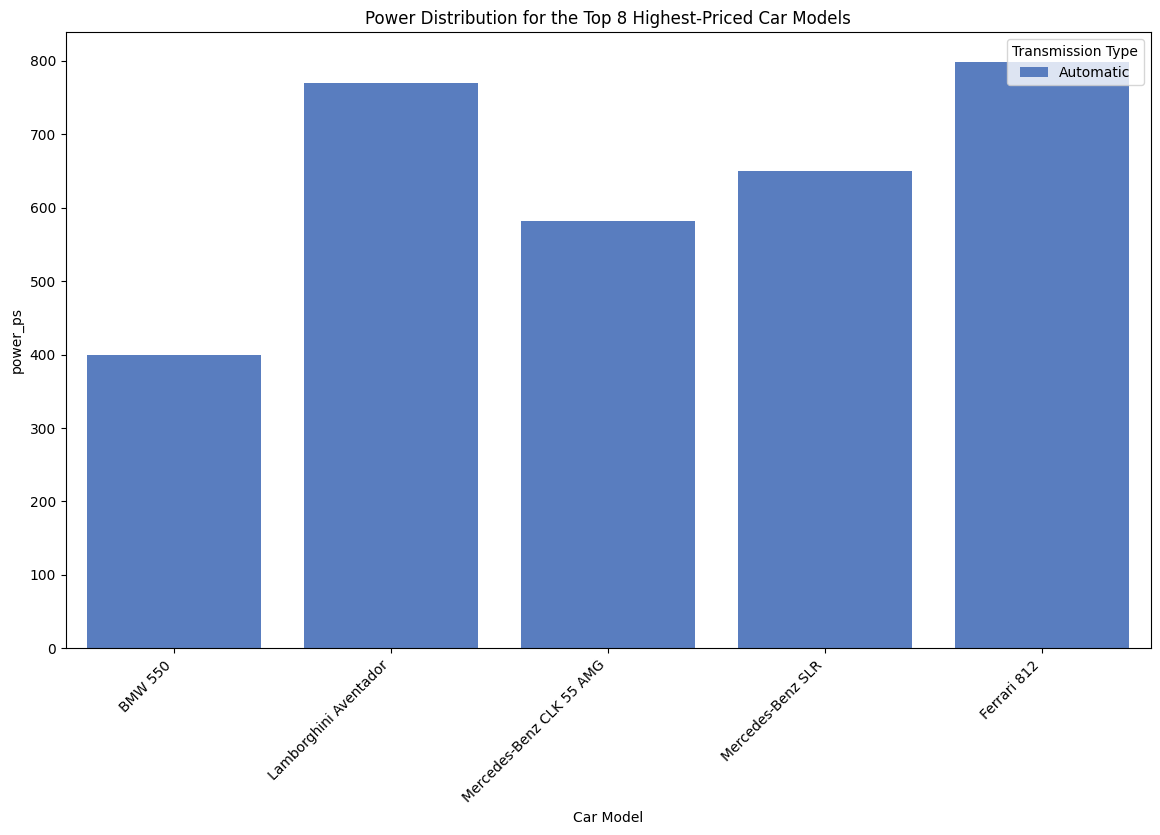

In [ ]:
#Research question 2:
#"How does the power distribution vary across different transmission types for the top 5 highest-priced car models?"

# Find the top 5 highest-priced car models overall
top_5_highest_priced_cars = df_no_outliers.nlargest(5, 'price_in_euro')

# Visualization: Grouped Barplot of Power by Transmission Type for the Top 5 Highest-Priced Car Models
plt.figure(figsize=(14, 8))
sns.barplot(x='model', y='power_ps', hue='transmission_type', data=top_5_highest_priced_cars, palette='muted', ci=None)
plt.title('Power Distribution for the Top 8 Highest-Priced Car Models')
plt.xlabel('Car Model')
plt.ylabel('power_ps')
plt.legend(title='Transmission Type', loc='upper right')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()
